In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def chi2(a,b,c,d):
    if a+b == 0:
        return (c-d)**2/(c+d)
    elif c+d == 0:
        return (a-b)**2/(a+b)
    else:
        return ((a-b)**2)/(a+b) + ((c-d)**2)/(c+d)

In [3]:
def LS(a,b,c,d): #local sensitivity
    stat = chi2(a,b,c,d); t = np.zeros(0)
    M = chi2(a,b,c,d); m = chi2(a,b,c,d)
    if a >= 2:
        t = [chi2(a-2,b+2,c,d), chi2(a-2,b+1,c+1,d), chi2(a-2,b+1,c,d+1), chi2(a-2,b,c+2,d), chi2(a-2,b,c+1,d+1),
             chi2(a-2,b,c,d+2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if b >= 2:
        t = [chi2(a+2,b-2,c,d), chi2(a+1,b-2,c+1,d), chi2(a+1,b-2,c,d+1), chi2(a,b-2,c+2,d), chi2(a,b-2,c+1,d+1),
             chi2(a,b-2,c,d+2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if c >= 2:
        t = [chi2(a+2,b,c-2,d), chi2(a+1,b+1,c-2,d), chi2(a+1,b,c-2,d+1), chi2(a,b+2,c-2,d), chi2(a,b+1,c-2,d+1),
             chi2(a,b,c-2,d+2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if d >= 2:
        t = [chi2(a+2,b,c,d-2), chi2(a+1,b+1,c,d-2), chi2(a+1,b,c+1,d-2), chi2(a,b+2,c,d-2), chi2(a,b+1,c+1,d-2),
             chi2(a,b,c+2,d-2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if a >= 1 and b >= 1:
        t = [chi2(a-1,b-1,c+2,d), chi2(a-1,b-1,c+1,d+1), chi2(a-1,b-1,c,d+2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if a >= 1 and c >= 1:
        t = [chi2(a-1,b+2,c-1,d), chi2(a-1,b+1,c-1,d+1), chi2(a-1,b,c-1,d+2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if a >= 1 and d >= 1:
        t = [chi2(a-1,b+2,c,d-1), chi2(a-1,b+1,c+1,d-1), chi2(a-1,b,c+2,d-1)]
        M = max([max(t),M])
        m = min([min(t),m])
    if b >= 1 and c >= 1:
        t = [chi2(a+2,b-1,c-1,d), chi2(a+1,b-1,c-1,d+1), chi2(a,b-1,c-1,d+2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if b >= 1 and d >= 1:
        t = [chi2(a+2,b-1,c,d-1), chi2(a+1,b-1,c+1,d-1), chi2(a,b-1,c+2,d-1)]
        M = max([max(t),M])
        m = min([min(t),m])
    if c >= 1 and d >= 1:
        t = [chi2(a+2,b,c-1,d-1), chi2(a+1,b+1,c-1,d-1), chi2(a,b+2,c-1,d-1)]
        M = max([max(t),M])
        m = min([min(t),m])
    if a >= 1:
        t = [chi2(a-1,b+1,c,d), chi2(a-1,b,c+1,d), chi2(a-1,b,c,d+1)]
        M = max([max(t),M])
        m = min([min(t),m])
    if b >= 1:
        t = [chi2(a+1,b-1,c,d), chi2(a,b-1,c+1,d), chi2(a,b-1,c,d+1)]
        M = max([max(t),M])
        m = min([min(t),m])
    if c >= 1:
        t = [chi2(a+1,b,c-1,d), chi2(a,b+1,c-1,d), chi2(a,b,c-1,d+1)]
        M = max([max(t),M])
        m = min([min(t),m])
    if d >= 1:
        t = [chi2(a+1,b,c,d-1), chi2(a,b+1,c,d-1), chi2(a,b,c+1,d-1)]
        M = max([max(t),M])
        m = min([min(t),m])
    
    return max([M-stat, stat-m])

In [4]:
def LS_all(n):
    t = int(2*n)
    ls = np.zeros((t+1,t+1,t+1))
    for a in range(t+1):
        for b in range(t-a+1):
            for c in range(t-a-b+1):
                d = t-a-b-c
                if a+b >= c+d and a+c >= b+d:
                    ls[a][b][c] = LS(a,b,c,d)
    for a in range(t+1):
        for b in range(t-a+1):
            for c in range(t-a-b+1):
                d = t-a-b-c
                if a+b < c+d and a+c >= b+d:
                    ls[a][b][c] = ls[c][d][a]
                elif a+b >= c+d and a+c < b+d:
                    ls[a][b][c] = ls[b][a][d]
                elif a+b < c+d and a+c < b+d:
                    ls[a][b][c] = ls[d][c][b]
    return ls

In [5]:
def S(n): #max_{x,y}(LS(x)/LS(y))
    t = int(2*n); ls = LS_all(n)
    s = 1
    for a in range(t+1):
        for b in range(t-a+1):
            for c in range(t-a-b+1):
                d = t-a-b-c
                if a+b >= c+d and a+c >= b+d:
                    ss = ls[a][b][c]
                    if a >= 2:
                        ss = max([ls[a-2][b+2][c], ls[a-2][b+1][c+1], ls[a-2][b+1][c], ls[a-2][b][c+2], 
                                  ls[a-2][b][c+1], ls[a-2][b][c], ss])
                    if b >= 2:
                        ss = max([ls[a+2][b-2][c], ls[a+1][b-2][c+1], ls[a+1][b-2][c], ls[a][b-2][c+2], 
                                  ls[a][b-2][c+1], ls[a][b-2][c], ss])
                    if c >= 2:
                        ss = max([ls[a+2][b][c-2], ls[a+1][b+1][c-2], ls[a+1][b][c-2], ls[a][b+2][c-2], 
                                  ls[a][b+1][c-2], ls[a][b][c-2], ss])
                    if d >= 2:
                        ss = max([ls[a+2][b][c], ls[a+1][b+1][c], ls[a+1][b][c+1], ls[a][b+2][c], 
                                  ls[a][b+1][c+1], ls[a][b][c+2], ss])
                    if a >= 1 and b >= 1:
                        ss = max([ls[a-1][b-1][c+2], ls[a-1][b-1][c+1], ls[a-1][b-1][c], ss])
                    if a >= 1 and c >= 1:
                        ss = max([ls[a-1][b+2][c-1], ls[a-1][b+1][c-1], ls[a-1][b][c-1], ss])
                    if a >= 1 and d >= 1:
                        ss = max([ls[a-1][b+2][c], ls[a-1][b+1][c+1], ls[a-1][b][c+2], ss])
                    if b >= 1 and c >= 1:
                        ss = max([ls[a+2][b-1][c-1], ls[a+1][b-1][c-1], ls[a][b-1][c-1], ss])
                    if b >= 1 and d >= 1:
                        ss = max([ls[a+2][b-1][c], ls[a+1][b-1][c+1], ls[a][b-1][c+2], ss])
                    if c >= 1 and d >= 1:
                        ss = max([ls[a+2][b][c-1], ls[a+1][b+1][c-1], ls[a][b+2][c-1], ss])
                    if a >= 1:
                        ss = max([ls[a-1][b+1][c], ls[a-1][b][c+1], ls[a-1][b][c], ss])
                    if b >= 1:
                        ss = max([ls[a+1][b-1][c], ls[a][b-1][c+1], ls[a][b-1][c], ss])
                    if c >= 1:
                        ss = max([ls[a+1][b][c-1], ls[a][b+1][c-1], ls[a][b][c-1], ss])
                    if d >= 1:
                        ss = max([ls[a+1][b][c], ls[a][b+1][c], ls[a][b][c+1], ss])
                    s = max([ss/ls[a][b][c], s])
    return s

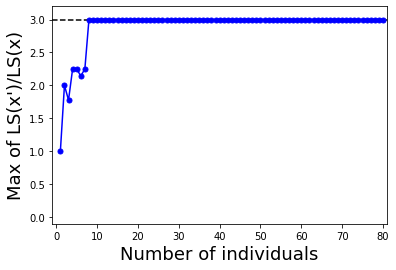

In [6]:
maxR = np.zeros(80); index = np.zeros(80)

for i in range(80):
    maxR[i] = S(i+1)
    index[i] = i+1

fig = plt.figure()
plt.ylim(-0.1, 3.2)
plt.xlim(-1, 81)
plt.hlines(3,-1,81,color="black", linestyle = "dashed")
plt.plot(index, maxR, marker="o", markersize=5, color = "blue", linestyle = "-")
plt.xlabel("Number of individuals", fontsize = 18)
plt.ylabel("Max of LS(x')/LS(x)", fontsize = 18)
fig.savefig("goodBeta_2*2.png")
fig.savefig("figs/goodBeta_2*2.eps", bbox_inches="tight", pad_inches=0.05)